# Medical Data: EDA


## Imports


In [1]:
import sys

# adds everything in the directory above to the path
sys.path.insert(0, '../')

In [2]:
# autoreload all libraries/modules
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np

import pandas as pd
from pandas.api.types import CategoricalDtype

In [4]:
pd.__version__

'2.2.1'

In [5]:
# plotting & graphing imports
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# string linkage imports
from thefuzz import fuzz, process
import recordlinkage

Custom


In [7]:
from src.generate_report import check_for_categorical

## Data Import & Initial Data Integrity Checks


In [8]:
path = "../data/medical_raw_data.csv"

medical = pd.read_csv(path)

In [9]:
medical.shape

(10000, 53)

As there are 53 columns, transposing the sample will make the column
names easier to read.


In [10]:
# display(medical.sample(5).T)

### Check data types & non-null values


In [11]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

### Drop superfluous indexing columns

The original dataset includes two identical columns that exist to
preserve the original record order. These two columns can be dropped as
pandas already provides a numeric index.


In [12]:
medical.iloc[:, 0:2]

,Unnamed: 0,CaseOrder
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
...,...,...
9995,9996,9996
9996,9997,9997
9997,9998,9998
9998,9999,9999


In [13]:
medical = medical.drop(medical.columns[[0, 1]], axis=1)

In [14]:
medical.columns.shape

(51,)

#### Columns containing null values

These columns contain null values:

| Category     | Nulls |
| ------------ | ----- |
| Children     | 2588  |
| Age          | 2414  |
| Income       | 2464  |
| Soft_drink   | 2467  |
| Overweight   | 982   |
| Anxiety      | 984   |
| Initial_days | 1056  |


In [15]:
# Columns containing null values
column_contains_null_counts = medical.isna().sum()[medical.isna().sum() > 0]

# index names of these columns
column_contains_null = column_contains_null_counts.index

display(
    column_contains_null_counts,
    column_contains_null)

Children        2588
Age             2414
Income          2464
Soft_drink      2467
Overweight       982
Anxiety          984
Initial_days    1056
dtype: int64

Index(['Children', 'Age', 'Income', 'Soft_drink', 'Overweight', 'Anxiety',
       'Initial_days'],
      dtype='object')

## Categorical Data

It's good practice to ensure categorical data is defined as such. The
`check_for_categorical` function creates a report and returns a list of
columns where the number of unique value counts remain under a given
threshold (with a default of 30).


In [16]:
possible_categories = check_for_categorical(
    medical,
    file="../reports/medical_cat_report.txt")

In [17]:
print(len(possible_categories))
print(possible_categories)

34
['Area', 'Timezone', 'Children', 'Education', 'Employment', 'Marital', 'Gender', 'ReAdmis', 'Doc_visits', 'Full_meals_eaten', 'VitD_supp', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']


Manual inspection suggests that these included column names should not be
considered categorical.

- Children
- Doc_visits
- Full_meals_eaten
- VitD_supp


In [18]:
for cat in ["Children", "Doc_visits", "Full_meals_eaten", "VitD_supp"]:

    if cat in possible_categories:
        possible_categories.remove(cat)

Manual inspection indicates that these columns should additionally be
considered categorical:

- City
- State
- County

These should added to the list of columns be cast to a categorical type.


In [19]:
for cat in ["City", "State", "County"]:

    if cat not in possible_categories:
        possible_categories.append(cat)

In [20]:
print(possible_categories)

['Area', 'Timezone', 'Education', 'Employment', 'Marital', 'Gender', 'ReAdmis', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'City', 'State', 'County']


In [21]:
# cast to categorical
for cat in possible_categories:
    medical[cat] = medical[cat].astype('category')

In [22]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Customer_id         10000 non-null  object  
 1   Interaction         10000 non-null  object  
 2   UID                 10000 non-null  object  
 3   City                10000 non-null  category
 4   State               10000 non-null  category
 5   County              10000 non-null  category
 6   Zip                 10000 non-null  int64   
 7   Lat                 10000 non-null  float64 
 8   Lng                 10000 non-null  float64 
 9   Population          10000 non-null  int64   
 10  Area                10000 non-null  category
 11  Timezone            10000 non-null  category
 12  Job                 10000 non-null  object  
 13  Children            7412 non-null   float64 
 14  Age                 7586 non-null   float64 
 15  Education           10000 non-null  c

### Categories with custom ordering

- [pandas.DataFrame.astype](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html)


### Complication risk Ordering

The `Complication_risk` category represents the 'level of complication
risk for the patient as assessed by a primary patient assessment'. It has
three categories that can be ordered.

- Low
- Medium
- High


In [23]:
medical['Complication_risk'].value_counts(dropna=False)

Complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64

In [24]:
complication_order = [
    'Low',
    'Medium',
    'High'
]

complication_dtype = CategoricalDtype(
    categories=complication_order,
    ordered=True)

medical["Complication_risk"] = (
    medical["Complication_risk"].astype(complication_dtype))

#### Education ordering

The named education categories represent various levels of education. Although some wide differences are very obvious (e.g. `No Schooling Completed` compared to `Doctorate Degree`) A few are a little more ambiguous.

Here is a proposed order.

Education:

- No Schooling Completed
- Nursery School to 8th Grade
- 9th Grade to 12th Grade, No Diploma
- GED or Alternative Credential
- Regular High School Diploma
- Some College, Less than 1 Year
- Some College, 1 or More Years, No Degree
- Associate's Degree
- Bachelor's Degree
- Master's Degree
- Doctorate Degree
- Professional School Degree


In [25]:
ed_order = [
    "No Schooling Completed",
    "Nursery School to 8th Grade",
    "9th Grade to 12th Grade, No Diploma",
    "GED or Alternative Credential",
    "Regular High School Diploma",
    "Some College, Less than 1 Year",
    "Some College, 1 or More Years, No Degree",
    "Associate's Degree",
    "Bachelor's Degree",
    "Master's Degree",
    "Doctorate Degree",
    "Professional School Degree"]

ed_dtype = CategoricalDtype(
    categories=ed_order,
    ordered=True)

medical["Education"] = medical["Education"].astype(ed_dtype)

#### Survey Question ordering


In [26]:
item_order = [8, 7, 6, 5, 4, 3, 2, 1]

item_dtype = CategoricalDtype(
    categories=item_order,
    ordered=True)

for i in range(1, 9):

    medical[f"Item{i}"] = medical[f"Item{i}"].astype(item_dtype)

#### Zip Codes

Zip codes have an additional challenge, as zip codes can begin with
leading zeros.

Zip codes in this dataset

- are limited to US locations
- do not include any "+ 4" codes

Process:

- Convert to string
- Use `rjust` to pad left with zeros for any short zip codes
- Convert to categorical


In [27]:
medical['Zip'] = medical['Zip'].astype(str).str.rjust(5, '0')

# visually confirm conversion & padding
medical['Zip'].sort_values().head()

7945    00610
1339    00617
5813    00622
8932    00624
1378    00631
Name: Zip, dtype: object

In [28]:
# convert to categorical
medical['Zip'] = pd.Categorical(medical['Zip'])

medical['Zip'].describe()

count     10000
unique     8612
top       24136
freq          4
Name: Zip, dtype: object

### Confirm categorical


In [29]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Customer_id         10000 non-null  object  
 1   Interaction         10000 non-null  object  
 2   UID                 10000 non-null  object  
 3   City                10000 non-null  category
 4   State               10000 non-null  category
 5   County              10000 non-null  category
 6   Zip                 10000 non-null  category
 7   Lat                 10000 non-null  float64 
 8   Lng                 10000 non-null  float64 
 9   Population          10000 non-null  int64   
 10  Area                10000 non-null  category
 11  Timezone            10000 non-null  category
 12  Job                 10000 non-null  object  
 13  Children            7412 non-null   float64 
 14  Age                 7586 non-null   float64 
 15  Education           10000 non-null  c

### Boolean Categorical

The categories with only 2 unique values present seem to all be coded
`Yes` or `No`. It would be more useful to change these to Boolean values.


In [30]:
possible_boolean = check_for_categorical(
    medical,
    threshold=2,
    file='../reports/boolean_cat_report.txt')

possible_boolean

['ReAdmis',
 'HighBlood',
 'Stroke',
 'Arthritis',
 'Diabetes',
 'Hyperlipidemia',
 'BackPain',
 'Allergic_rhinitis',
 'Reflux_esophagitis',
 'Asthma']

In [31]:
medical[possible_boolean].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ReAdmis             10000 non-null  category
 1   HighBlood           10000 non-null  category
 2   Stroke              10000 non-null  category
 3   Arthritis           10000 non-null  category
 4   Diabetes            10000 non-null  category
 5   Hyperlipidemia      10000 non-null  category
 6   BackPain            10000 non-null  category
 7   Allergic_rhinitis   10000 non-null  category
 8   Reflux_esophagitis  10000 non-null  category
 9   Asthma              10000 non-null  category
dtypes: category(10)
memory usage: 99.0 KB


- [`pandas.Series.cat.rename_categories`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.cat.rename_categories.html)


In [32]:
for cat in possible_boolean:

    if 'Yes' in list(medical[cat].unique()):

        medical[cat] = medical[cat].cat.rename_categories(
            {'Yes': 1, 'No': 0})

In [33]:
post_convert_boolean = check_for_categorical(
    medical,
    threshold=2,
    file='../reports/boolean_post_convert_report.txt')

In [34]:
medical[possible_categories].describe().T

,count,unique,top,freq
Area,10000,3,Rural,3369
Timezone,10000,26,America/New_York,3889
Education,10000,12,Regular High School Diploma,2444
Employment,10000,5,Full Time,6029
Marital,10000,5,Widowed,2045
Gender,10000,3,Female,5018
ReAdmis,10000,2,0,6331
Soft_drink,7533,2,No,5589
Initial_admin,10000,3,Emergency Admission,5060
HighBlood,10000,2,0,5910


## Initial missing data check


Columns with missing values

- Children
- Age
- Income
- Soft_drink
- Overweight
- Anxiety
- Initial_days


In [35]:
# Which columns contain null values
def col_contains_nulls(df):

    col_lst = list()

    for col in df.columns[1:]:

        if df[col].isna().sum() > 0:

            col_lst.append(col)

    return col_lst


incomplete_cols = col_contains_nulls(medical)
incomplete_cols

['Children',
 'Age',
 'Income',
 'Soft_drink',
 'Overweight',
 'Anxiety',
 'Initial_days']

In [36]:
medical[incomplete_cols].isna().sum().index

Index(['Children', 'Age', 'Income', 'Soft_drink', 'Overweight', 'Anxiety',
       'Initial_days'],
      dtype='object')

In [37]:
medical[incomplete_cols].isna().sum()

Children        2588
Age             2414
Income          2464
Soft_drink      2467
Overweight       982
Anxiety          984
Initial_days    1056
dtype: int64

### Number of Complete observations

How many rows would be available if only rows with all observations were
kept?

It looks like only 2313 records have entries for every feature.


In [38]:
# dropping rows with any missing values
medical.dropna().shape

(2313, 51)

How many columns would be available if only columns with all observations
were kept?

There are 44 columns that have all observations (7 columns have missing
values)


In [39]:
medical.dropna(axis=1).shape

(10000, 44)

#### Check missing categories against one another

There doesn't seem to be any noteworthy correlation between categories
containing missing values.

This suggests that each category is missing completely at random (MCAR)


<Axes: >

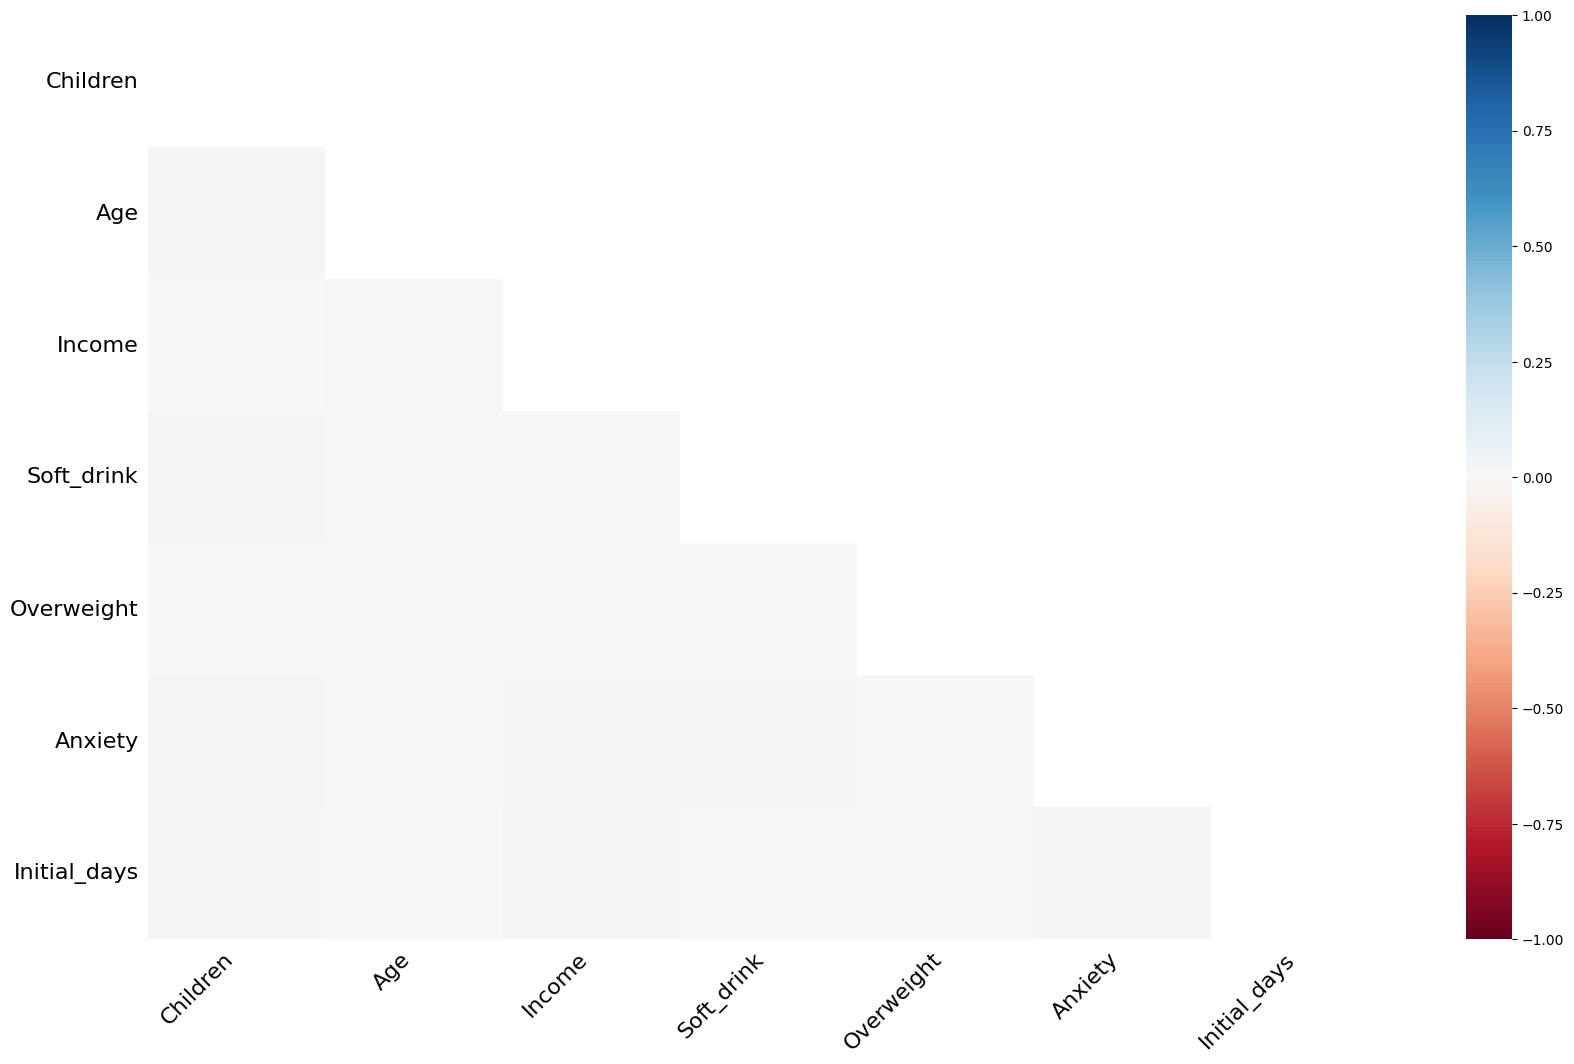

In [40]:
msno.heatmap(medical[incomplete_cols])

<Axes: >

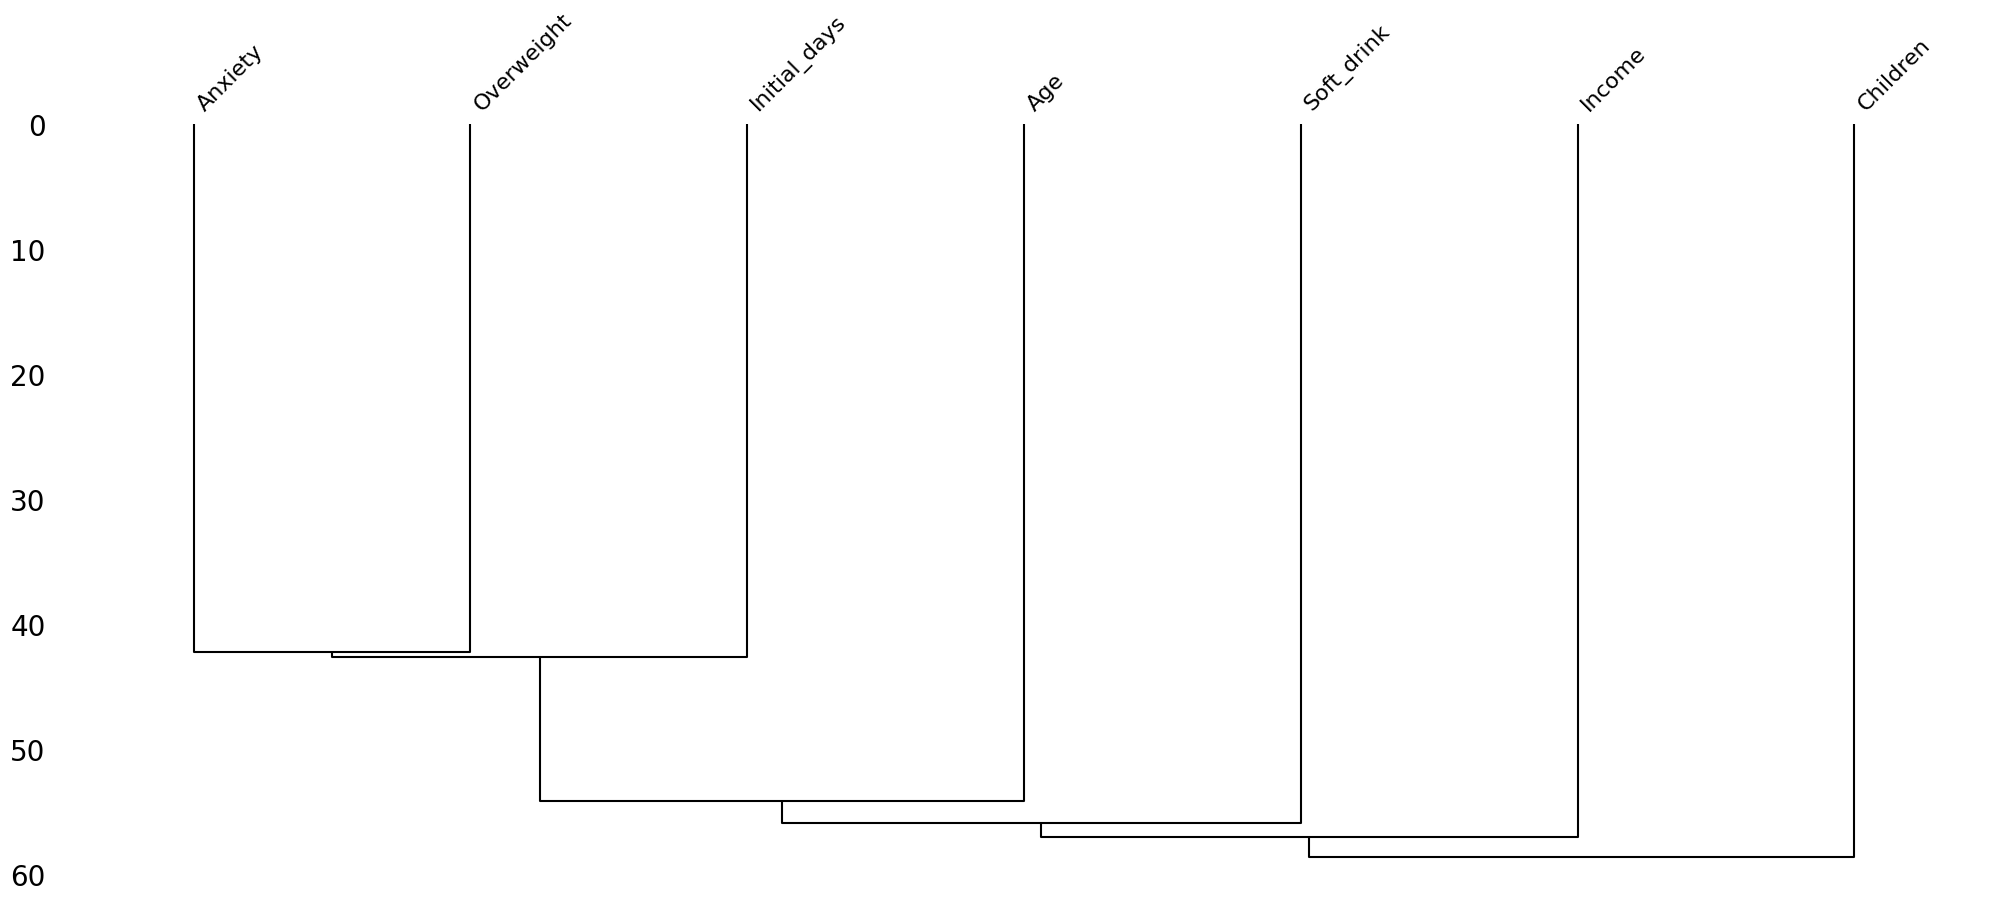

In [41]:
msno.dendrogram(medical[incomplete_cols])

<Axes: >

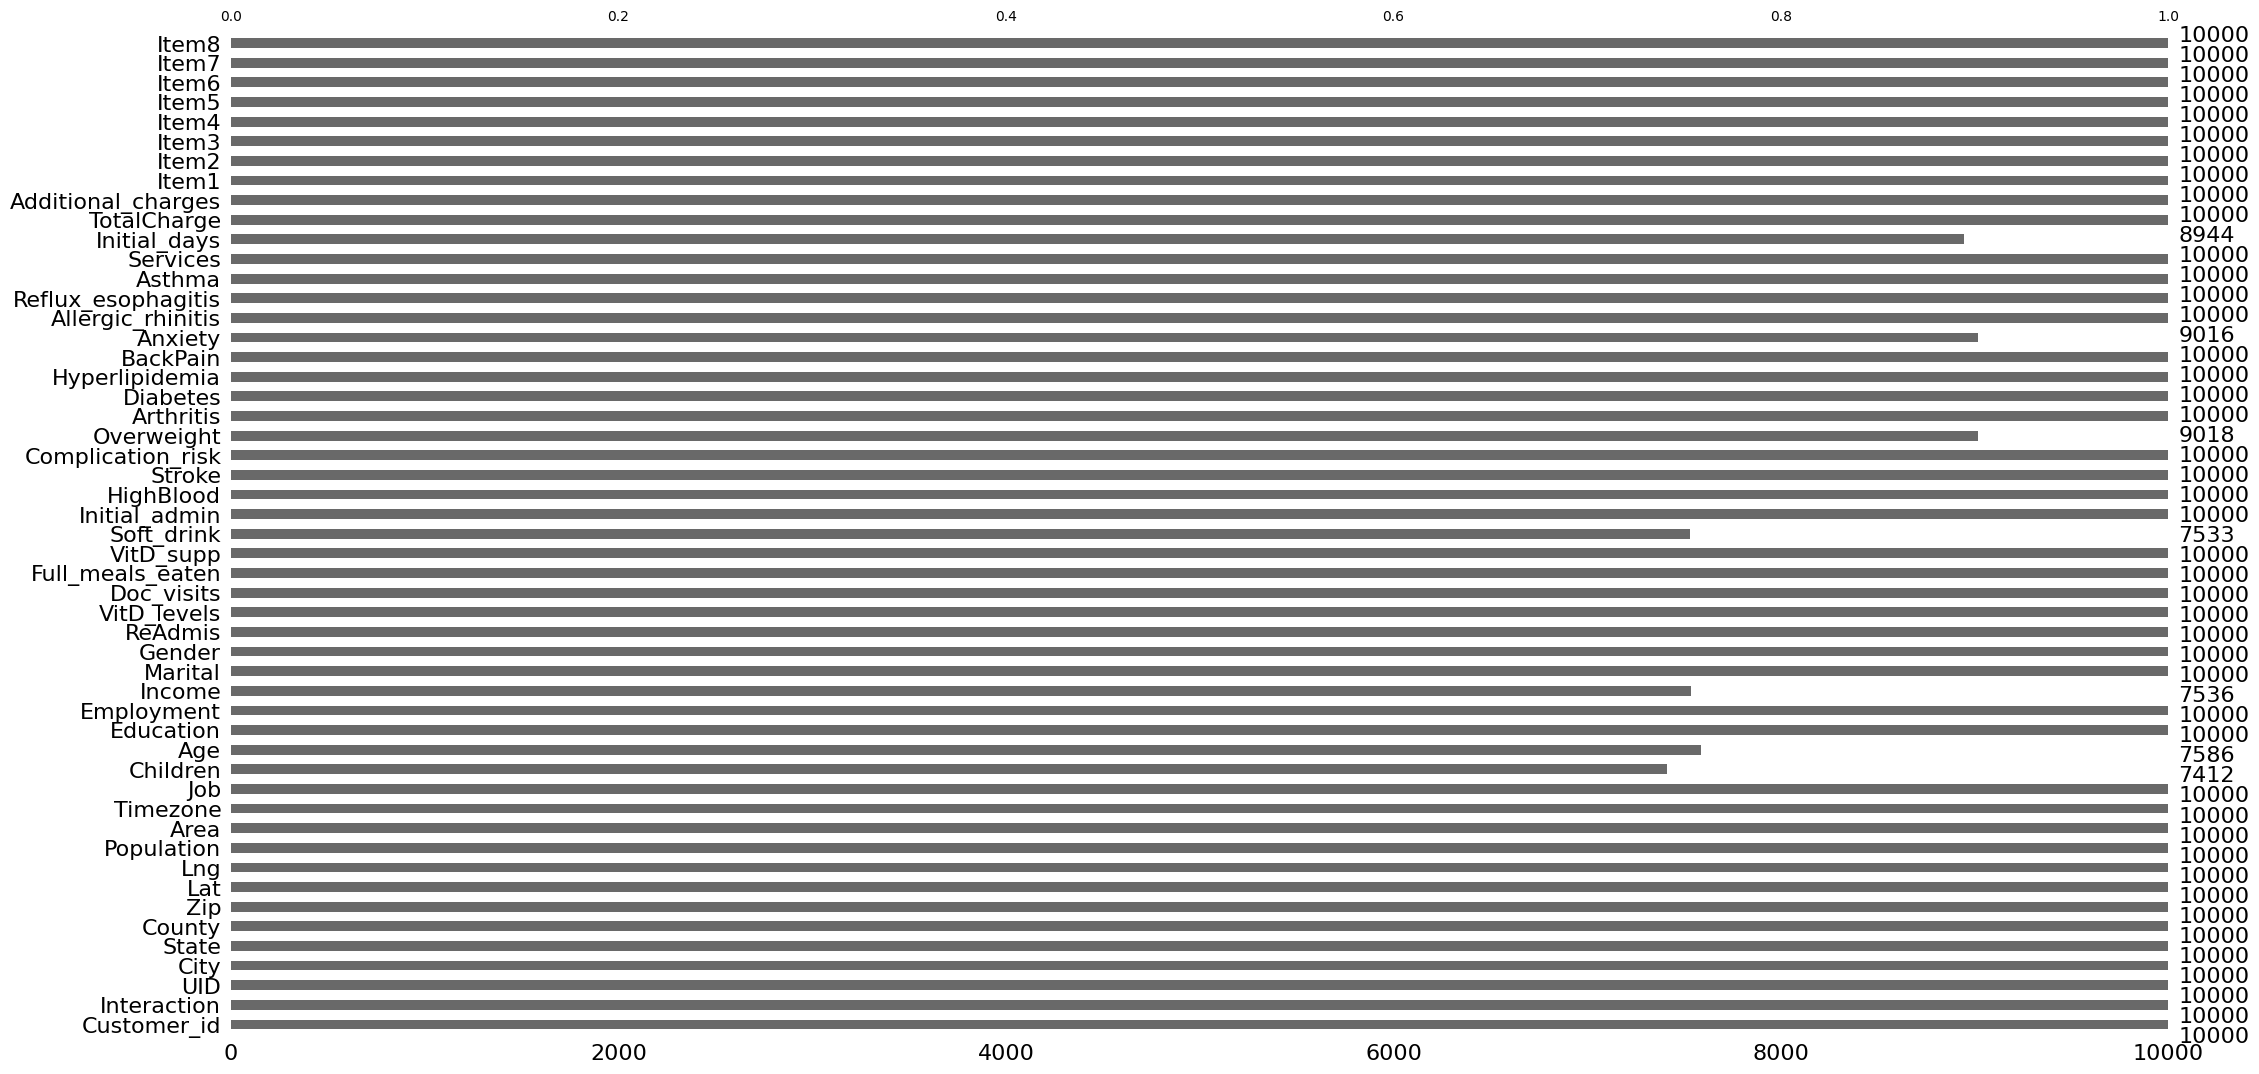

In [42]:
msno.bar(medical)

In [43]:
medical[incomplete_cols].describe()

,Children,Age,Income,Initial_days
count,7412.000000,7586.000000,7536.000000,8944.000000
mean,2.098219,53.295676,40484.438268,34.432082
std,2.155427,20.659182,28664.861050,26.287050
min,0.000000,18.000000,154.080000,1.001981
25%,0.000000,35.000000,19450.792500,7.911709
50%,1.000000,53.000000,33942.280000,34.446941
75%,3.000000,71.000000,54075.235000,61.124654
max,10.000000,89.000000,207249.130000,71.981486


In [44]:
for feature in medical.columns:
    print(feature, "\n\t", medical[feature].sample(5).values)

Customer_id 
	 ['A231405' 'O00001' 'E648073' 'M762552' 'L630091']
Interaction 
	 ['b1890af1-a330-47ff-baaf-dcce4d61ae22'
 'bb3ca4fc-aa16-40b8-b6ff-8e483222f0f5'
 '7be99b2b-ec66-46ea-a8da-dd141eea527b'
 '2bcdbb16-d7c1-4289-bb83-93c55ed17a5c'
 '341bbddb-d05d-4f1c-b387-c78da6389561']
UID 
	 ['a55bf5c2537e52a6366f86731ceda52b' 'ce0e485be8a1a48720cd1f921fd9daeb'
 '8d50e78934a1012e011fd567756161fb' '13184984f4a54a90f00b34422aba99cc'
 '7721c6bdfff74198a4e4e46347268a10']
City 
	 ['Zenda', 'Jefferson', 'Searsport', 'La Ward', 'Stoddard']
Categories (6072, object): ['Aaronsburg', 'Abbeville', 'Aberdeen', 'Abilene', ..., 'Zelienople', 'Zenda', 'Zenia', 'Zumbro Falls']
State 
	 ['KY', 'MS', 'IL', 'IL', 'OR']
Categories (52, object): ['AK', 'AL', 'AR', 'AZ', ..., 'WA', 'WI', 'WV', 'WY']
County 
	 ['Bay', 'Shelby', 'New London', 'Walworth', 'Bannock']
Categories (1607, object): ['Abbeville', 'Acadia', 'Accomack', 'Ada', ..., 'Yuma', 'Zapata', 'Zavala', 'Ziebach']
Zip 
	 ['73568', '49051', '22902', '

In [45]:
# medical.VitD_supp.value_counts()
# medical.Doc_visits.value_counts()
# medical.Full_meals_eaten.value_counts()
# medical.Full_meals_eaten.value_counts()
# medical.Initial_admin.value_counts().index
# medical.Services.value_counts().index
# len(medical.Timezone.value_counts().index.categories)
medical.Age.value_counts(dropna=False)

Age
NaN     2414
30.0     126
47.0     124
74.0     123
38.0     123
        ... 
82.0      90
75.0      90
63.0      90
51.0      89
36.0      85
Name: count, Length: 73, dtype: int64

In [46]:
# print(
#     medical.VitD_levels.min(),
#     medical.VitD_levels.max())

# print(
#     medical.Initial_days.min(),
#     medical.Initial_days.max())

print(
    medical.Age.min(),
    medical.Age.max())

18.0 89.0


In [47]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Customer_id         10000 non-null  object  
 1   Interaction         10000 non-null  object  
 2   UID                 10000 non-null  object  
 3   City                10000 non-null  category
 4   State               10000 non-null  category
 5   County              10000 non-null  category
 6   Zip                 10000 non-null  category
 7   Lat                 10000 non-null  float64 
 8   Lng                 10000 non-null  float64 
 9   Population          10000 non-null  int64   
 10  Area                10000 non-null  category
 11  Timezone            10000 non-null  category
 12  Job                 10000 non-null  object  
 13  Children            7412 non-null   float64 
 14  Age                 7586 non-null   float64 
 15  Education           10000 non-null  c

In [48]:
for i in range(1, 9):
    print(medical[f"Item{i}"].value_counts().sort_index())

Item1
8       1
7      10
6     225
5    1377
4    3455
3    3404
2    1315
1     213
Name: count, dtype: int64
Item2
8       0
7      12
6     204
5    1421
4    3351
3    3439
2    1360
1     213
Name: count, dtype: int64
Item3
8       1
7      11
6     220
5    1358
4    3464
3    3379
2    1356
1     211
Name: count, dtype: int64
Item4
8       0
7      12
6     231
5    1388
4    3394
3    3422
2    1346
1     207
Name: count, dtype: int64
Item5
8       0
7      13
6     219
5    1308
4    3446
3    3423
2    1380
1     211
Name: count, dtype: int64
Item6
8       0
7      10
6     220
5    1403
4    3464
3    3371
2    1319
1     213
Name: count, dtype: int64
Item7
8       0
7      11
6     212
5    1274
4    3487
3    3456
2    1345
1     215
Name: count, dtype: int64
Item8
8       0
7      12
6     221
5    1429
4    3337
3    3401
2    1391
1     209
Name: count, dtype: int64


In [49]:
item_cols = [f"Item{i}" for i in range(1, 9)]

survey_reverse = medical[item_cols].copy(deep=True)

In [50]:
entry_inverse_map = {
    1: 8,
    2: 7,
    3: 6,
    4: 5,
    5: 4,
    6: 3,
    7: 2,
    8: 1
}

for i in range(1, 9):

    survey_reverse[f"Item{i}"] = (
        survey_reverse[f"Item{i}"].astype(int).map(entry_inverse_map))

In [51]:
display(
    survey_reverse.head(),
    medical[item_cols].head())

,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,6,6,7,7,5,6,6,5
1,6,5,6,5,5,5,6,6
2,7,5,5,5,6,5,6,6
3,6,4,4,6,5,4,4,4
4,7,8,6,6,4,6,5,6


,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,3,3,2,2,4,3,3,4
1,3,4,3,4,4,4,3,3
2,2,4,4,4,3,4,3,3
3,3,5,5,3,4,5,5,5
4,2,1,3,3,5,3,4,3
